<h2 style="text-align: center; color: blue"> Francis Onyango Owino</h2>
<p style="text-align: center; color: darkgreen">Student Number: 23250844</p>


<h1 style = "color: darkblue">1. Data Loading and Initial Exploration</h1>

I start by importing the revelant libraries. Specifically, **pandas** for loading the data and data manipulation, **matplotlib** and **seaborn** for data visulization. <br>Since I already installed the libaries while working with jupyter before on my computer, I will only load them using the *import* keyword followed by the function name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # to ignore warnings when the data is loaded to the notebook 
warnings.filterwarnings('ignore') 
from matplotlib import style
style.use("seaborn")

<h3 style = "color: darkteal"> 1.1 Information on the dataset including the number of rows and columns </h3>

Next, I load the Melbourne housing dataset into my jupyter notebook using the pandas package using the **.csv** method and specifying the data directory. Once the data is loaded, I try to have a glipmse of the dataset. I use the **shape** method to view the number of rows and columns and the **head** method to look at a few observaations at the top. 

In [2]:
housing_data = pd.read_csv("C://Users/user/Desktop/Melbourne_housing.csv")

In [3]:
housing_data.shape

(34857, 22)

In [4]:
housing_data.columns  # Looking at the column names in the dataset

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude',
       'Regionname', 'Propertycount', 'ParkingArea', 'Price'],
      dtype='object')

In [5]:
housing_data.head(2)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0


From the above analysis, the dataset contains  34857 rows and 22 columns. 

<h3 style = "color: darkteal"> 1.2 The Target Variable and its Distribution

Looking at the target variable (*Price*) and its ditribution, we note that Price is not normally distributed. The histogram is tail-heavy. It is skewed to the right.

In [6]:
target = housing_data[['Price']]

In [7]:
target.head()

,Price
0,NaN
1,840000.0
2,1275000.0
3,1455000.0
4,NaN


In [8]:
target.describe()

,Price
count,2.724700e+04
mean,1.050173e+06
std,6.414671e+05
min,8.500000e+04
25%,6.350000e+05
50%,8.700000e+05
75%,1.295000e+06
max,1.120000e+07


I found it important to view the summary statistics of the of the target variable. Price ranges from 85,0000 USD to 11,200,000 USD. There seems to be a very high variability in the values.

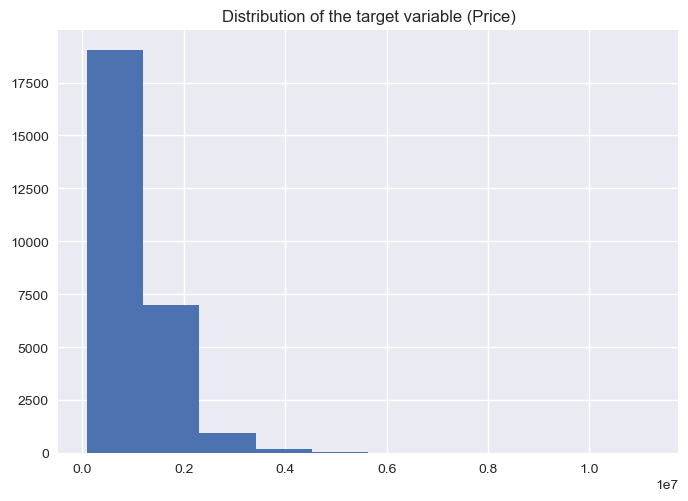

In [9]:
target.hist()
plt.title("Distribution of the target variable (Price)")
plt.show()

<h3 style = "color: darkteal"> 1.3 Summary Statistcis  and Data Types of the Features </h3>

To display the summary statistcis and  data types of the feature, I need the features which are all the columns except the target variable column. I define a new dataframe called features by dropping *Price* column from the the housing_data dataframe. Upon having my features dataframe, I use the inbuilt pandas method  **.describe()** to get the summary statistcis and **.info()** to get the data types of the features.

In [10]:
features = housing_data.drop(columns = ["Price"], axis = 1)

In [11]:
features.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,1.0,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,1.0,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,0.0,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,0.0,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,1.0,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade


In [12]:
features.describe()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount
count,34857.000000,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,37.328178,0.090279,0.120169,4428.090313
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,2106.000000,-37.390200,145.526350,21650.000000


In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

The summary statistics table drops all variables whose data type is object. Summary statistics is ony applied to numeric variables. With regard to the variable data types, the above table displays the **column**, **the non-null count** and **Dtype** which gives the data type of a variable. In total, the data contains **10 float variables**, **1 int varible** and **10 object variables**.  The data type of each variable is a good indicator of the feature engineering methods to use and can also inform on the type of machine learning model to use depending on the nature of the response variable.

<h3 style = "color: darkteal"> 1.4 Missing values </h3>


In [14]:
housing_data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

There is significant   missing obserevations in the  dataset. The **BuildingArea** column has the highest amount of missing observations. **YearBuilt**, **Landsize**, **Bedroom**, **Bathroom**, **Latitude**, **Longitude** and **Price** all have substantial missing observations. In this case, dropping the missing observations could come at a penalty of losing important information in the dataset. Therefore, I propose to use **simple mean imputation** to handle the mising observations. In this method, (*the simple mean imputer*) fills the missing observations with the mean of each column where the observation is missing. In the event where the variable is a categorical one, I will still use the simple imputer but the method will be **most frequent**  since we cannot get the mean of categorical variables.

<h1 style = "color: darkblue">2. Exploratory Data Analysis (EDA)</h1>

To get  data with numeric columns from the housing_data dataframe, I use a for loop to loop through the columns of the dataset and drop those columns whose data type is an object. Once I get these columns, I get the corresponding data from the housing_data using the numeric columns

In [15]:
numeric_columns = []

for col in housing_data.columns:
    if housing_data[col].dtype != "object":
        numeric_columns.append(col)

In [16]:
numeric_columns_data = housing_data[numeric_columns]

In [17]:
numeric_columns_data.shape

(34857, 12)

In [18]:
list(numeric_columns_data.columns)

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom',
 'Bathroom',
 'Car',
 'Landsize',
 'YearBuilt',
 'Latitude',
 'Longtitude',
 'Propertycount',
 'Price']

<h3 style = "color: darkteal" id = "section2"> 2.1 Visualizing the distribution of numeric variables using histograms and box plots </h3>

To make my visualizations easy, I use a for loop to loop through all the columns of the numeric features. I also use the subplots sub-module conatined in matplotlib module combined with the seaborn module to have both the histograms and the boxplots.



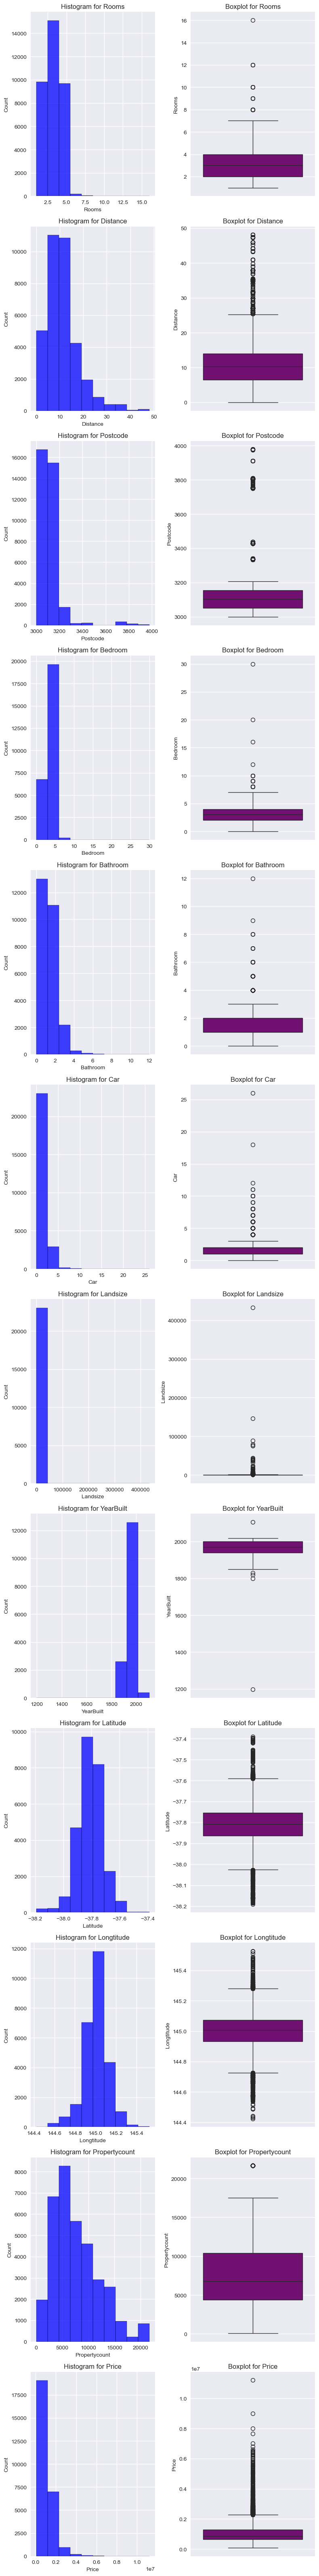

In [19]:
fig, axes = plt.subplots(len(numeric_columns_data.columns), 2, figsize = (8,64))
for i, column in enumerate(numeric_columns_data.columns):
    
#     Using seaborn to draw histograms for each varaible
    sns.histplot(numeric_columns_data[column], bins = 10, ax = axes[i,0], color = 'blue')
    axes[i,0].set_title(f"Histogram for {column}")
    
#     Using Seaborn to draw boxplot for each variable
    
    sns.boxplot(numeric_columns_data[column],  ax = axes[i,1], color = 'purple')
    axes[i,1].set_title(f"Boxplot for {column}")
    

plt.tight_layout()
    
plt.show()

The histograms and the boxplots show the distribution of each variable. From the visualizations, the variables are skewed to the right as shown by the histograms. The boxplots also show that the majority of the variables have outliers since there are data points beyond the whiskers.

<h3 style = "color: darkteal"> 2.2 Explore relationships between features and the target variable using scatter plots and correlation matrices </h3>

A scatter plot shows a pictorial relationship between two values in an cartesian plane. I utilise the matplotlib package to draw the scatterplots between the features and the target variable. I set the title and the axis labels for each scatter plot and the display the output.

For correlation matrix, I use the seaborn package to draw a heatmap with correlation coefficients between the variables.

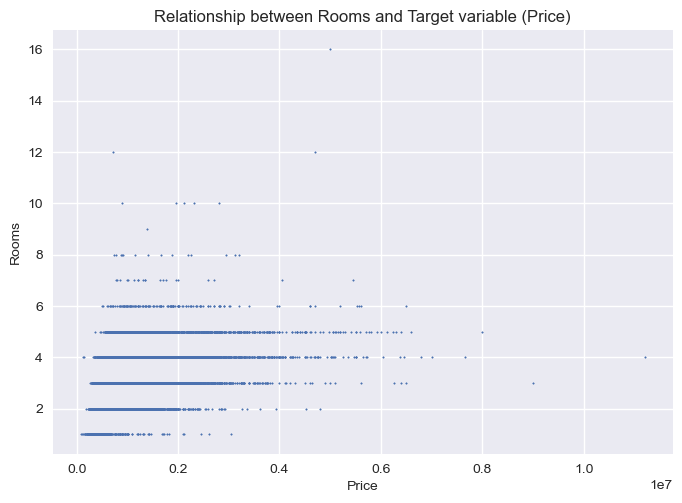

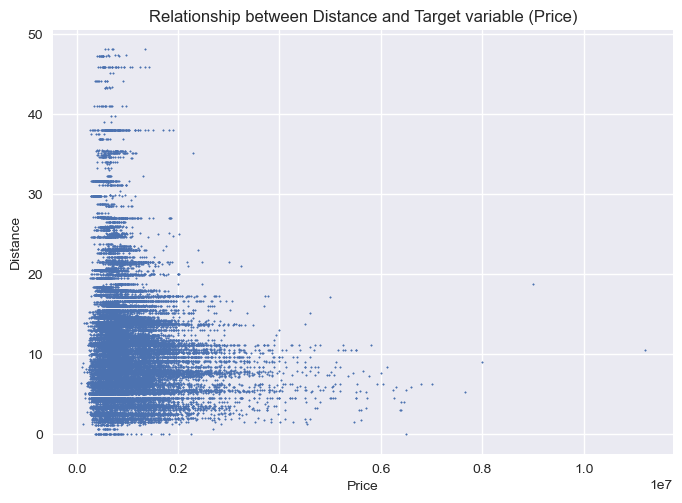

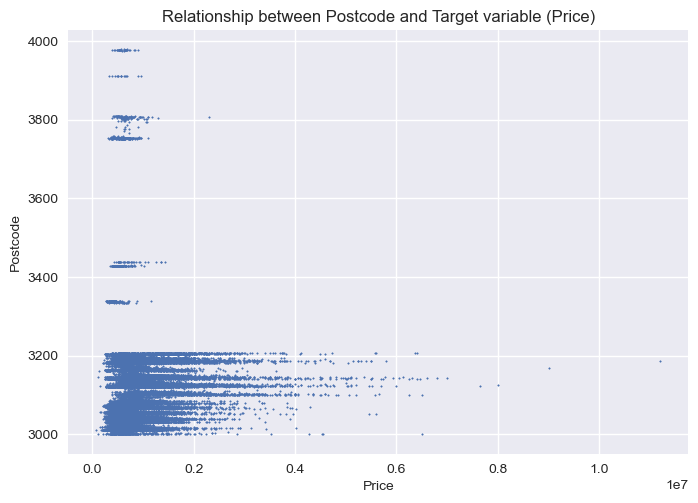

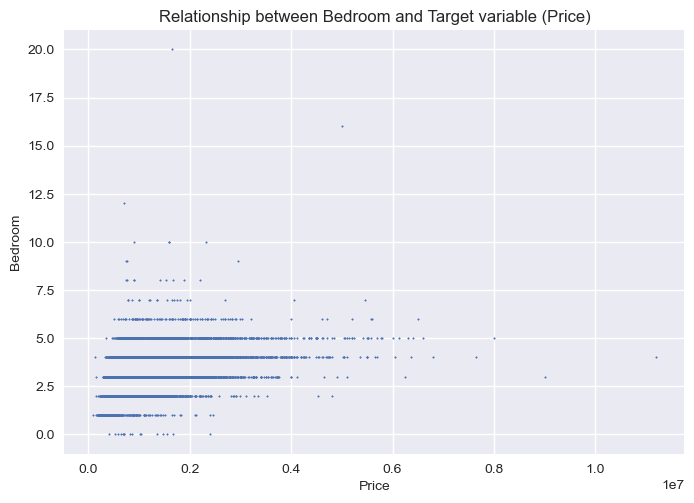

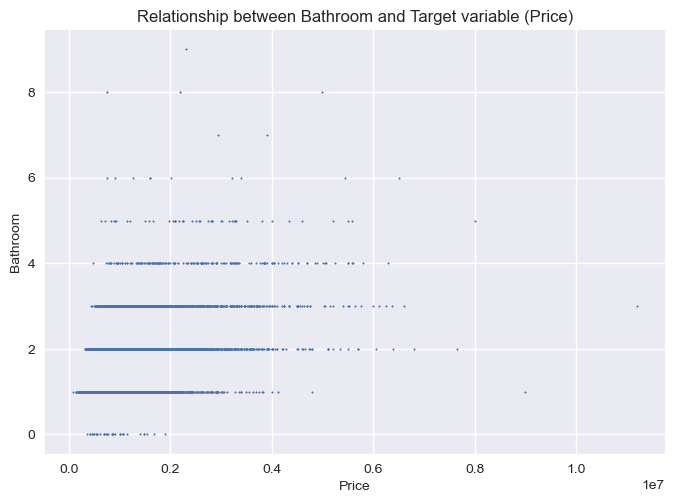

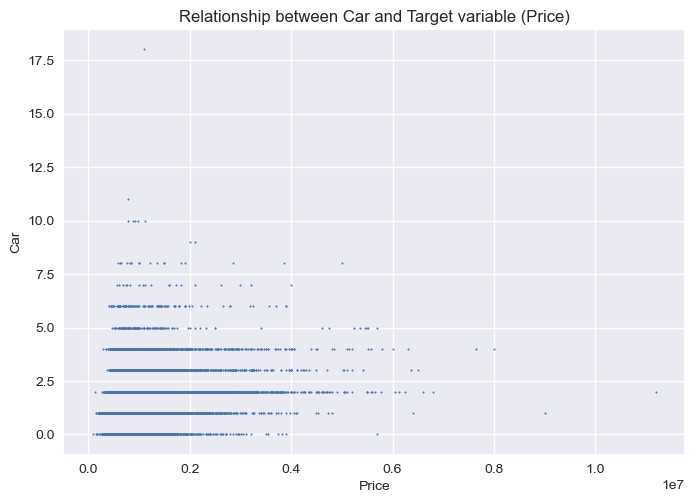

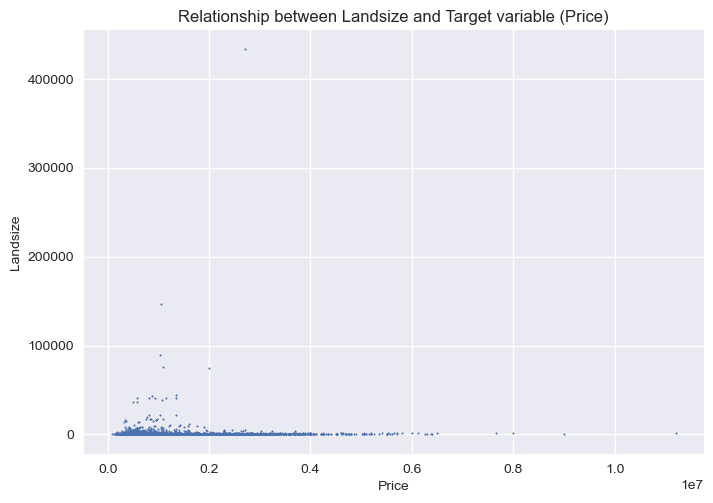

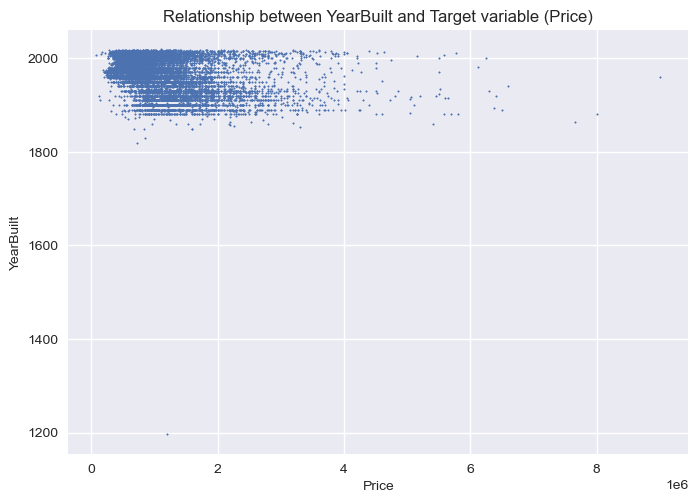

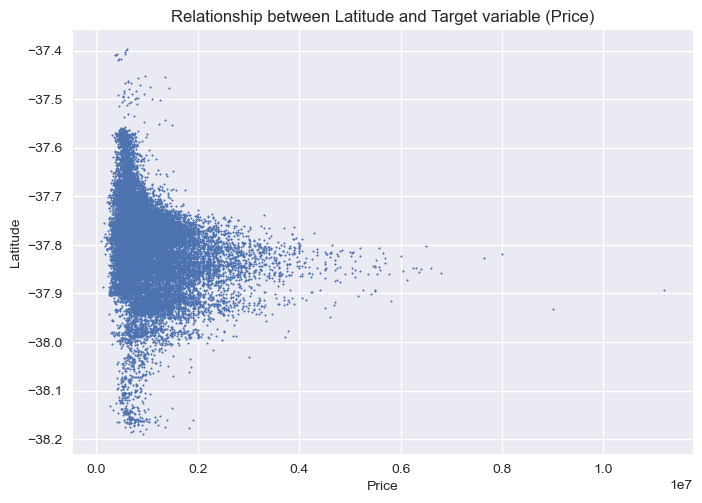

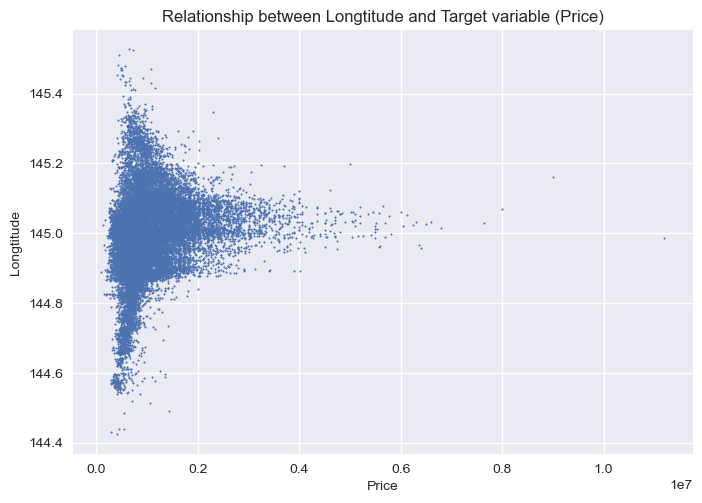

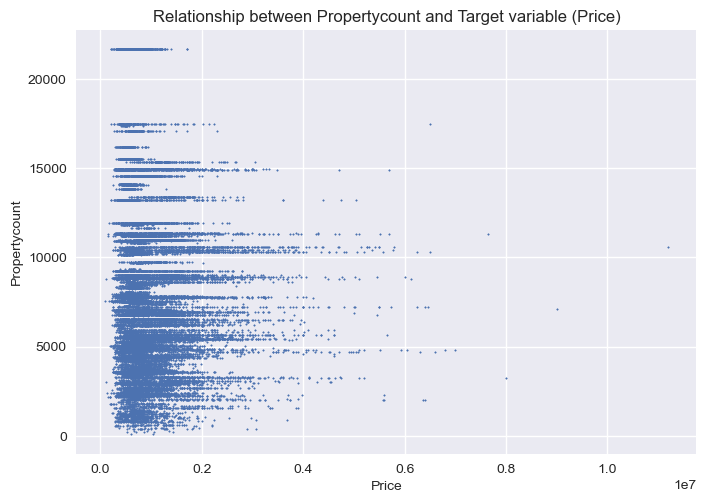

In [20]:
for column in numeric_columns_data.iloc[:,:-1].columns:
    plt.scatter(target, numeric_columns_data[column], s= 1.2)
    plt.title(f"Relationship between {column} and Target variable (Price)")
    plt.xlabel("Price")
    plt.ylabel(column)
    plt.show()

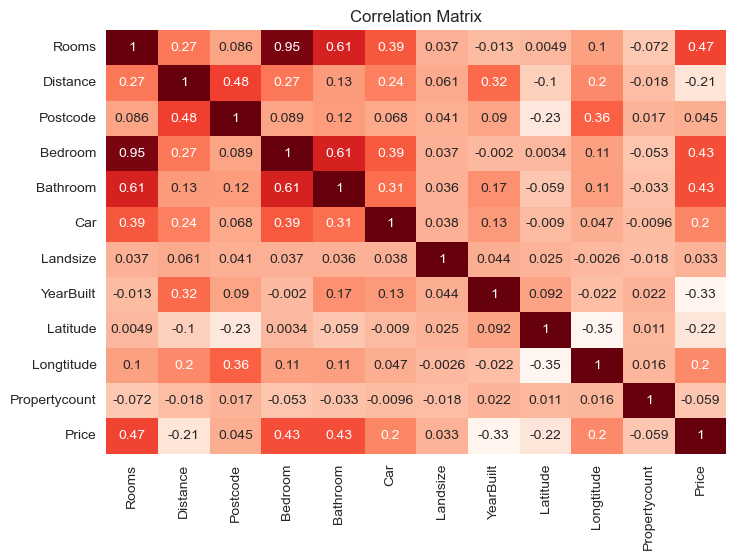

In [21]:
sns.heatmap(numeric_columns_data.corr(), 
            annot = True, 
            cmap = "Reds",
            cbar = False
           )
plt.title("Correlation Matrix")
plt.show()

From the analysis, there seems not be a clear relationship between the variables. The scatterplots do not show a clear linear relationship as we may expect. The  points seem to be cluttered on the left hand side of the plots.

The correlation matrix tries to quantify these relationships but does not however show causality. From the matrix, the variable **Bedroom** has a strong positive correlation with the variable **Rooom**. Similarly, the variable **Bedroom** and **Bathroom** also have a fairly high positive correlation.  All other variables are weakly correlated either positively on negatively.

<h3 style = "color: darkteal"> 2.3 Examining categorical variables with bar plots and frequency tables </h3>

For modelling purposes, any data type that is an object will be converted to categorical variable. I have noted that the **Date** column and the **BuildingArea** column have been encoded as objects. These variables cannot be treated as categorical varibales. I have therefore dropped these two columns from this section. Again, some variables have very many categories which when plotted will clutter the visualization. To avoid this, I will limit the visualization to only top five categories. 

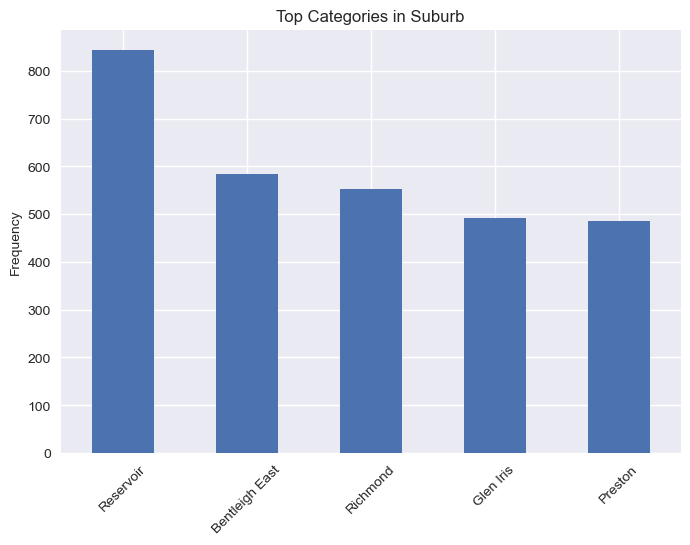

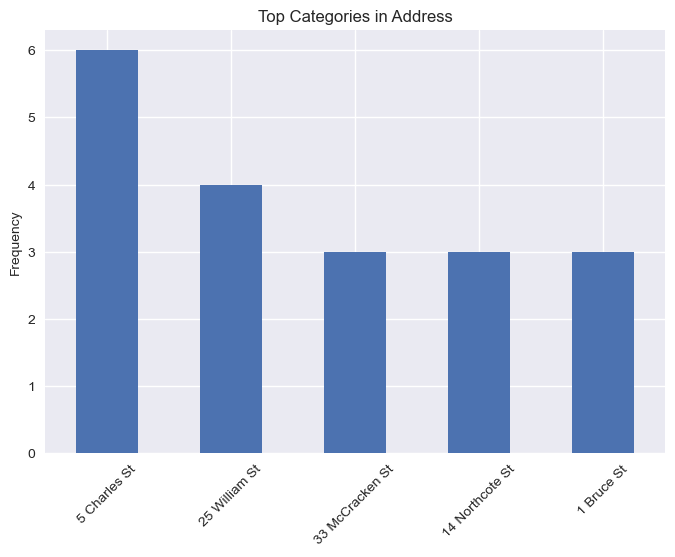

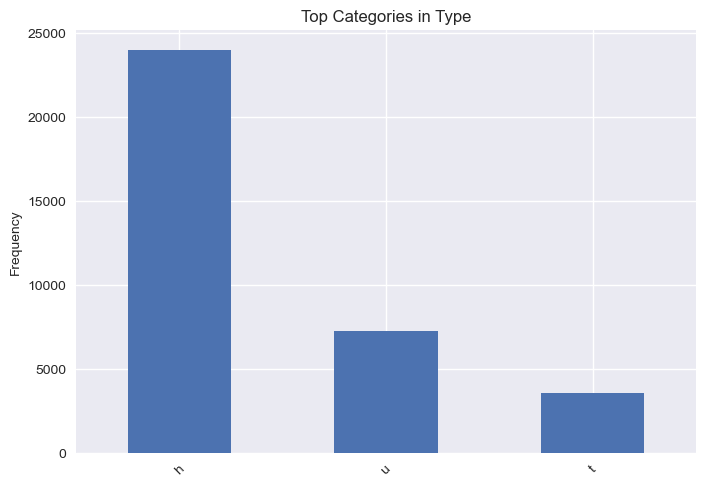

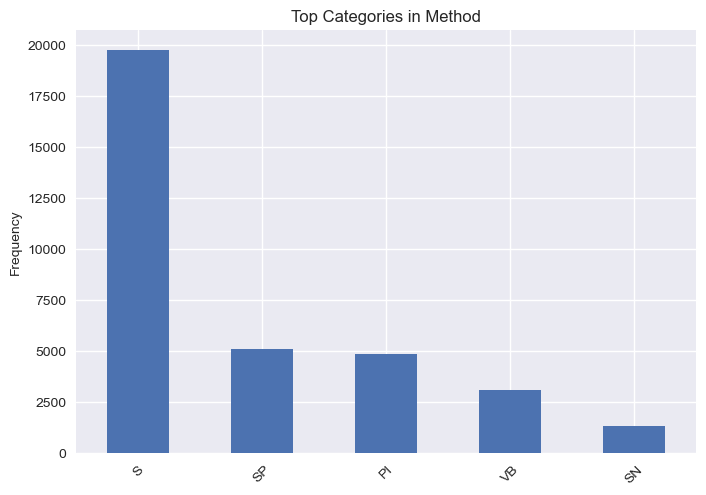

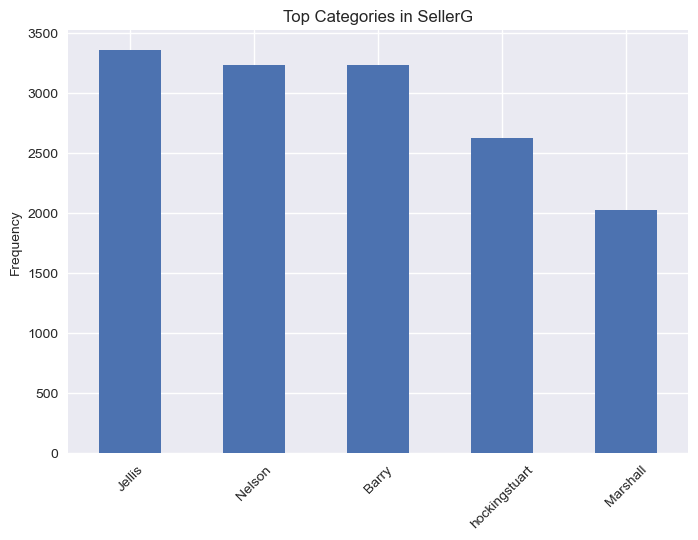

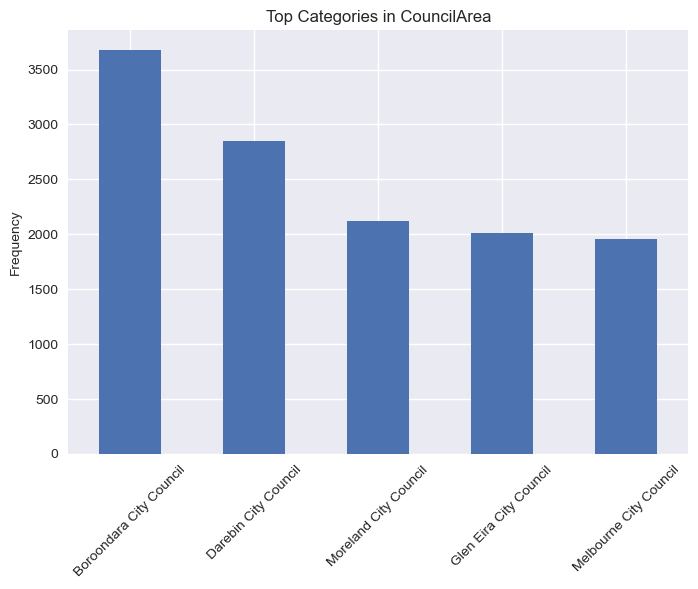

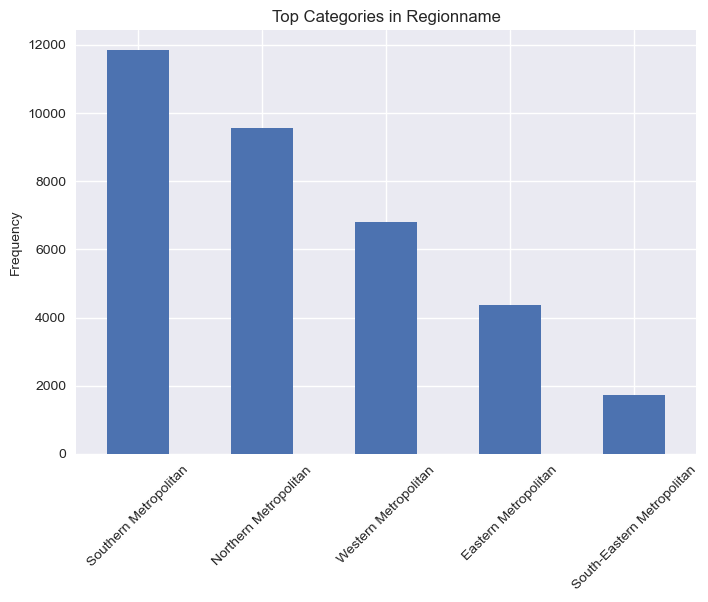

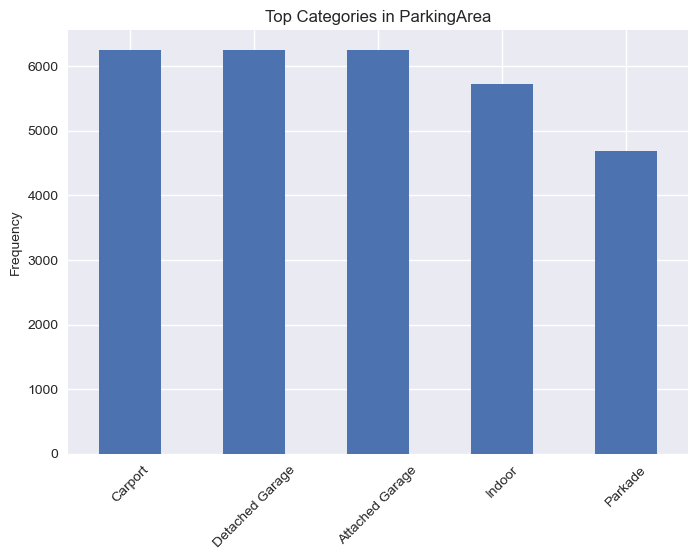

In [22]:
housing_data2 = housing_data.drop(columns = ["Date", "BuildingArea"])
for column in housing_data2.columns:
    if housing_data2[column].dtype == "object":
        housing_data2[column].value_counts(sort = True)[:5].plot(kind = 'bar',
                                                               rot = 45)
        plt.title(f"Top Categories in {column}")
        plt.ylabel("Frequency")
        plt.show()

The code below shows the frequency table of the distribution of different categories in each categorical variable. The number against each category shows the count (number) of times the category appears. This is mainly done in pandas using the **.count_values()** sub-module

In [23]:

for column in housing_data2.columns:
    if housing_data2[column].dtype == "object":
        frequency_table = housing_data2[column].value_counts(sort = True)[:5].reset_index()
        frequency_table.columns = ['Category', column]
        print(frequency_table)
        print()
    

         Category  Suburb
0       Reservoir     844
1  Bentleigh East     583
2        Richmond     552
3       Glen Iris     491
4         Preston     485

          Category  Address
0     5 Charles St        6
1    25 William St        4
2  33 McCracken St        3
3  14 Northcote St        3
4       1 Bruce St        3

  Category   Type
0        h  23980
1        u   7297
2        t   3580

  Category  Method
0        S   19744
1       SP    5095
2       PI    4850
3       VB    3108
4       SN    1317

        Category  SellerG
0         Jellis     3359
1         Nelson     3236
2          Barry     3235
3  hockingstuart     2623
4       Marshall     2027

                  Category  CouncilArea
0  Boroondara City Council         3675
1     Darebin City Council         2851
2    Moreland City Council         2122
3   Glen Eira City Council         2006
4   Melbourne City Council         1952

                     Category  Regionname
0       Southern Metropolitan       11836
1   

<h3 style = "color: darkteal"> 2.4 Identify potential outliers and discuss their impact on the dataset </h3>

Outliers are data points that signfiicantly different from the rest of the data points. I  will rely heavily on the boxplots displayed <u>visual inspection </u> in <a href ="#section2" style = "color: teal">section 2.1</a> above to identify these outliers. In the boxplots, points that are outisde the whiskers are outliers. <br> <br>
From the boxplots, all the variables seem to have outliers except for variables **Propertycount** and **YearBuilt**. <br><br>
The existence of outlier is our dataset may have a probelm when it comes to modelling. Some algorithms may fail to detect the right pattern of the data and make wrong generalizations.

In [24]:
housing_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude',
       'Regionname', 'Propertycount', 'ParkingArea', 'Price'],
      dtype='object')

<h1 style = "color: darkblue">3. Feature Engineering</h1>

<h3 style = "color: darkteal"> 3.1 Apply at least five feature engineering techniques to improve the dataset for modeling purposes </h3>.

In order to improve the data for modelling purposes, I intend to carry out the following feature engineering methods:  
<ol>
      <li style = "color: darkorange; font-family: Georgia">Simple Imputation to Handle Missing Observations</li> 
     This method is available on the sckit-learn package in Python. I can decide to impute the missing observations in each column with the mean of the column or its median. Since my data is highly skewed, using the mean may not be a good idea since it is affected by the presence of outliers. In this case, I will impute the median observations with the median of each column where the value is missing. With regard to categorical variables, the best method for imputation is the most frequent category. 
           <li style = "color: darkorange; font-family: Georgia">One Hot Encoding for Handling Categorical Variables</li>Since our machine learning algorithm cannot use categorical variables in training and testting, their is need to encode these variables. Again, I will make use of the scikit-learn module in Python. One-Hot Encoding generates dummy variables for the categroies. When one category assumes the value 1, the rest assume the value zero and vice-versa.
    
  <li style = "color: darkorange; font-family: Georgia">Transformation - Polynomial Features</li> Most of the times we usually assume a linear relationship between variables to be modelled in the data. Some relationships are usually not linear and can  even be polynomial. In this case, I will use polynomial function found in scikit-learn from the preprocessing sub-module to tranform the variables to polynomial with a degree of 2.
    <li style = "color: darkorange; font-family: Georgia">Feature Scaling</li> Since our variables are of different scale (measurement), there is need to have a uniform scale. In order to do, this I will use the Standard Scaler again from the preprocessing sub-module in scikit-learn module
    <li style = "color: darkorange ; font-family: Georgia">Handling Outliers - Winsorizing</li> This method is used to replace extreme values with less extreme values. Here, I will use the <b>FunctionTransformer</b> sub-module from sklearn.preprocessing module.
    
</ol>


In order to make my work easier, I will need a pipeline to bundle all these steps together. The sklearn's pipeline sub-module comes in handly for this task.

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [26]:
categorical_features = features.select_dtypes(include=["object"]).columns
numerical_features = features.select_dtypes(exclude=["object"]).columns

After importing all the relevant libaries, I select features whose data types are objects (for categorical variables) and those whose data types are not objects (numerical variables). The need to separate these variables is informed by the fact that in imputation, we cannot use the mean for categorical variables. I am going to use the mode (most frequent) observation in each category.

The next step is to define my transformers. Here, for the simple imputer, I will have two, one for categorical variable and the other for numerical variable. This is because we cannot get the mean of categorical variable. For numerical variables , I will impute the missing observations with the mean while for the categorical variables, I will use the most frequent observation / category. Other transformers are the standard scalar, the winsorize, the polynomial and the OneHotEconcoder.

The model only accepts categorical variables are strings. It is for this reason that I convert the categorical variables into strings.

In [27]:
categorical_imputer = SimpleImputer(strategy="most_frequent")
numerical_imputer = SimpleImputer(strategy="median")
scalar = StandardScaler()
poly_features = PolynomialFeatures(degree=2)

features[categorical_features] = features[categorical_features].astype(str)

winsorizer = FunctionTransformer(lambda X: IsolationForest(contamination=0.5).fit(X))

Next, I create separate Pipelines for both the numerical and categorical variables. The categorical variable will only have **the most_frequent** simple imputer and **OneHotEncoding**. On the other hand, numerical features will have **the simple mean imputer**, **the Standard Scalar** and **the polynomial features**. The winsorizer transformer is not data type specific and will will used across all the variables.

In [28]:
categorical_transformer = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', numerical_imputer),
    ('scaler', scalar),
    ('poly_features', poly_features)
])

The next step is to bind categorical transformer and the numerical transformer together using a column tranformer. This is shown below.

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
])


Finally, we need to have the final pipeline which can be used to fit and transform the data.  This will be a combination of the **preprocessor** variable above <span style = "color: darkblue">(A combination of the simple imputer for the numerical and categorical variables, OneHot Encoder for the categorical variables, Standard Scalar and Polynomial features for the numerical variables)</span>. What is missing is the winsorizer which is applied to all variables. Once I have my pipeline in place, I fit and transform the features. This is the last step of feature engineering. The transformed features are therefore ready be be used in the model training. The code is shown below.

In [30]:
engineering_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('winsorizer', winsorizer)
])

# Fitting and  transforming  my features 
transformed_features = engineering_pipeline.fit_transform(features)


<h1 style = "color: darkblue">4. Conclusion and Recommendations </h1>

From the above processes  (EDA & Feature Engineering), the following are the key findings:

<ol>
    <li>That the data has several missing observations in majority of the variables</li>
    <li>That the correlation between the variables is not very much clear and cannot be assumed to be linear</li>
    <li>That majority of the variables skewed to the right as shown by the histograms and show the presence of outliers are seen from the boxplots</li>
    <li>The data contains both numerical and categorical variables</li>
    
</ol>


The existence of above observations from the EDA neccesitated a raft of feature engineering measures to address these findings.

I used the simple imputer of fill in missing observations from the dataset. OneHotEncoding was used to encode the categorical variables into dummies, Polynomial features was used to have the data have a non-linear distribution since the correlation matrix did not convey a clear relationship, the standard scalar was used to make sure the values had a uniform scale and reduce variability while winsorizer was used to cut down on outliers.

In conclusion, EDA is a critical step in understanding the data. It helps identify anomalies and discover patterns hence informs on the best feature engineering methods to use.  This is usually required to make sure there is best model performance.

I recommednd that the target variable should also be subjected to feature engineering especially the simple imputer at the least since is also has missing observations.